<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/DL_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망(Convolutional Neural Networks, CNNs)

- 이미지 인식, 음성 인식 등에 자주 사용되는데,  
  특히, 이미지 인식 분야에서 거의 모든 딥러닝 기술에 사용

<br>

## 컨볼루션 신경망의 등장
- 1989년 얀 르쿤(Yann LeCun) 교수의 논문에서 발표

  - 필기체 인식에서 의미가 있었지만 범용화하는데에는 무리

- 1998년, "Gradient-Based Learning Applied to Document Recognition"이라는 논문에서 LeNet-5 제시

- 합성곱 층(convolution layer), 풀링 층(pooling layer) 소개
  <br>

  <img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png">
  
  <center>[LeNet-5 구조]</center>

  <sub>출처: https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4</sub>


## 완전연결계층과의 차이
- 완전연결계층(Fully-Connected Layer)은 이미지와 같은 데이터의 형상(3차원)을 무시함  

- 모든 입력데이터를 동등하게 취급  
  즉, **데이터의 특징을 잃어버리게 됨**

- 컨볼루션층(convolution layer)은 <u>**이미지 픽셀 사이의 관계를 고려**</u>

- 완전연결계층은 공간정보를 손실하지만, 컨볼루션층은 공간정보를 유지  
  - 이미지와 같은 2차원(흑백) 또는 3차원(컬러)의 형상을 유지

  - 공간정보를 유지하기 때문에 완전연결계층에 비해 적은 수의 파라미터를 요구


## 컨볼루션 신경망 구조 예시

<img src="https://www.oreilly.com/library/view/neural-network-projects/9781789138900/assets/c38754ca-f2ea-425a-b7a6-1fe0f2f5074e.png" width="600">

<sub>출처: https://www.oreilly.com/library/view/neural-network-projects/9781789138900/8e87ad66-6de3-4275-81a4-62b54436bf16.xhtml</sub>



## 합성곱 연산
- 필터(filter) 연산
  - 입력 데이터에 필터를 통한 어떠한 연산을 진행
  
  - **필터에 대응하는 원소끼리 곱하고, 그 합을 구함**

  - 연산이 완료된 결과 데이터를 **특징 맵(feature map)**이라 부름

- 필터(filter)
  - 커널(kernel)이라고도 칭함
  
  - 흔히 사진 어플에서 사용하는 '이미지 필터'와 비슷한 개념

  - 필터의 사이즈는 "거의 항상 홀수"
    - 짝수이면 패딩이 비대칭이 되어버림
  
    - 왼쪽, 오른쪽을 다르게 주어야함
  
    - 중심위치가 존재, 즉 구별된 하나의 픽셀(중심 픽셀)이 존재

  - 필터의 학습 파라미터 개수는 입력 데이터의 크기와 상관없이 일정  
    따라서, 과적합을 방지할 수 있음

  <br>
  <img src="http://deeplearning.net/software/theano_versions/dev/_images/numerical_no_padding_no_strides.gif">

  <sub>출처: http://deeplearning.net/software/theano_versions/dev/tutorial/conv_arithmetic.html</sub>


- 연산 시각화
  <img src="https://www.researchgate.net/profile/Ihab_S_Mohamed/publication/324165524/figure/fig3/AS:611103423860736@1522709818959/An-example-of-convolution-operation-in-2D-2.png" width="500">

  <sub>출처: https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524</sub>


- 일반적으로, 합성곱 연산을 한 후의 데이터 사이즈는  
  ### $\quad (n-f+1) \times (n-f+1)$
    $n$: 입력 데이터의 크기  
    $f$: 필터(커널)의 크기


  <img src="https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width="400">

  <sub>출처: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1</sub>
  
  위 예에서 입력 데이터 크기($n$)는 5, 필터의 크기($k$)는 3이므로  
  출력 데이터의 크기는 $(5 - 3 + 1) = 3$


## 패딩(padding)과 스트라이드(stride)
- 필터(커널) 사이즈과 함께 **입력 이미지와 출력 이미지의 사이즈를 결정**하기 위해 사용

- 사용자가 결정할 수 있음



### 패딩
- 입력 데이터의 주변을 특정 값으로 채우는 기법
  - 주로 0으로 많이 채움

  <img src="http://deeplearning.net/software/theano_versions/dev/_images/arbitrary_padding_no_strides.gif" width="300">

- 출력 데이터의 크기
  ### $\quad (n+2p-f+1) \times (n+2p-f+1)$

  위 그림에서, 입력 데이터의 크기($n$)는 5, 필터의 크기($f$)는 4, 패딩값($p$)은 2이므로    
  출력 데이터의 크기는 ($5 + 2\times 2 - 4 + 1) = 6$

### 'valid' 와 'same'
- 'valid'
  - 패딩을 주지 않음
  - padding=0 (0으로 채워진 테두리가 아니라 패딩을 주지 않는다는 의미)

- 'same'
  - 패딩을 주어 입력 이미지의 크기와 연산 후의 이미지 크기를 같게함

  - 만약, 필터(커널)의 크기가 $k$ 이면,  
    패딩의 크기는 $p = \frac{k-1}{2}$ (단, <u>stride=1)</u>



### 스트라이드
- 필터를 적용하는 간격을 의미

- 아래는 그림의 간격 2

  <img src="http://deeplearning.net/software/theano_versions/dev/_images/no_padding_strides.gif">


## 출력 데이터의 크기

## $\qquad OH = \frac{H + 2P - FH}{S} + 1 $ 
## $\qquad OW = \frac{W + 2P - FW}{S} + 1 $ 

- 입력 크기 : $(H, W)$

- 필터 크기 : $(FH, FW)$

- 출력 크기 : $(OH, OW)$

- 패딩, 스트라이드 : $P, S$

- (주의) 
  - 위 식의 값에서 $\frac{H + 2P - FH}{S}$ 또는 $\frac{W + 2P - FW}{S}$가 정수로 나누어 떨어지는 값이어야 함
  - 만약, 정수로 나누어 떨어지지 않으면  
    패딩, 스트라이드값을 조정하여 정수로 나누어 떨어지게 해야함


## 풀링(Pooling)

- 필터(커널) 사이즈 내에서 특정 값을 추출하는 과정

### 맥스 풀링(Max Pooling)
- 가장 많이 사용되는 방법

- 출력 데이터의 사이즈 계산은 컨볼루션 연산과 동일
## $\quad OH = \frac{H + 2P - FH}{S} + 1 $ 
## $\quad OW = \frac{W + 2P - FW}{S} + 1 $ 

- 일반적으로 stride=2, kernel_size=2 를 통해  
  **특징맵의 크기를 <u>절반으로 줄이는 역할</u>**

- 모델이 물체의 주요한 특징을 학습할 수 있도록 해주며,  
  컨볼루션 신경망이 이동 불변성 특성을 가지게 해줌
  - 예를 들어, 아래의 그림에서 초록색 사각형 안에 있는  
    2와 8의 위치를 바꾼다해도 맥스 풀링 연산은 8을 추출

- 모델의 파라미터 개수를 줄여주고, 연산 속도를 빠르게 해줌

  <br>

  <img src="https://cs231n.github.io/assets/cnn/maxpool.jpeg" width="600">

  <sub>출처: https://cs231n.github.io/convolutional-networks/</sub>

### 평균 풀링(Avg Pooling)

- 필터 내의 있는 픽셀값의 평균을 구하는 과정

- 과거에 많이 사용, 요즘은 잘 사용되지 않는다.

- 맥스풀링과 마찬가지로 stride=2, kernel_size=2 를 통해  
  특징 맵의 사이즈를 줄이는 역할

  <img src="https://www.researchgate.net/profile/Juan_Pedro_Dominguez-Morales/publication/329885401/figure/fig21/AS:707709083062277@1545742402308/Average-pooling-example.png" width="600">

  <sub>출처: https://www.researchgate.net/figure/Average-pooling-example_fig21_329885401</sub>

## 합성곱 연산의 의미

## 2차원 이미지에 대한 필터 연산 예시
  - 가장 자리 검출(Edge-Detection)

  - 소벨 필터(Sobel Filter)

    - Horizontal : 가로 방향의 미분을 구하는 필터 역할

    - Vertical : 세로 방향의 미분을 구하는 필터 역할  

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT_ZRkuiCkv0ZEHFiyCp-7Y5bCL0liaYSQ4mg&usqp=CAU" width="350">

  <sub>출처: https://www.cloras.com/blog/image-recognition/</sub>


### modules import

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
import requests
from io import BytesIO


### util functions

In [ ]:
def url_to_image(url, gray=False):
  resp = urllib.request.urlopen(url)
  image = np.array(bytearray(resp.read()), dtype="uint8")

  if gray == True:
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
  else:
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  return image

def filtered_image(image, filter, output_size):
  filtered_image = np.zeros((output_size, output_size))
  filter_size = filter.shape[0]

  for i in range(output_size):
    for j in range(output_size):
      multiply_values = image[i: (i + filter_size), j:(j+filter_size)] * filter
      sum_value = np.sum(multiply_values)

      if(sum_value > 255):
        sum_value = 255
      
      filtered_image[i,j] = sum_value
  
  return filtered_image


### 이미지 확인
- 예시이므로 정사각형 사이즈로 진행

image.shape (512, 512)


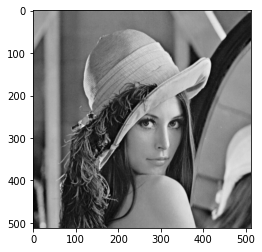

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png?20170110121321"

image = url_to_image(img_url, gray=True)
print("image.shape", image.shape)

plt.imshow(image, cmap='gray')
plt.show()

### 필터연산 적용

output size: 510


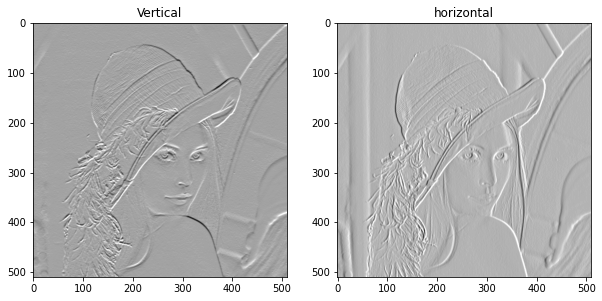

In [ ]:
vertical_filter = np.array([[1., 2., 1.],
                            [0., 0., 0.],
                            [-1., -2., -1.]
                            ])

horizontal_filter = np.array([[1., 0., -1.],
                             [2., 0., -2.],
                             [1., 0., -1.]
                            ])

output_size = int((image.shape[0]-3) / 1 + 1)
print("output size:", output_size)

vertical_filtered = filtered_image(image, vertical_filter, output_size)
horizontal_filtered = filtered_image(image, horizontal_filter, output_size)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Vertical')
plt.imshow(vertical_filtered, cmap = "gray")

plt.subplot(1,2,2)
plt.title('horizontal')
plt.imshow(horizontal_filtered, cmap = "gray")
plt.show()


### 이미지 필터를 적용한 최종 결과

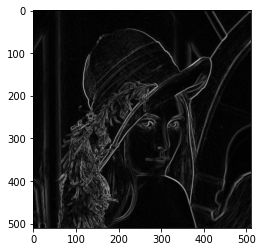

In [ ]:
sobel_img = np.sqrt(np.square(horizontal_filtered) + np.square(vertical_filtered))
plt.imshow(sobel_img, cmap='gray')

## 3차원 데이터의 합성곱 연산
- **이미지는 3차원으로 구성**
  - (가로, 세로, 채널 수)
  - 채널 : RGB 

- 색상값의 정도에 따라 color색 결정

  <img src="https://www.projectorcentral.com/images/articles/RGB-Explained-600.jpg">

  <sub>출처: https://www.projectorcentral.com/All-About-Bit-Depth.htm?page=What-Bit-Depth-Looks-Like</sub>

### 아래의 이미지 확인은 참고사항

image.shape (512, 512, 3)


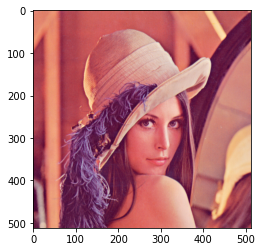

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png?20170110121321"

image = url_to_image(img_url)
print("image.shape", image.shape)

plt.imshow(image)
plt.show()

In [ ]:
image_copy = image.copy()
image_copy[:, :, 1] = 0
image_copy[:, :, 2] = 0
image_red = image_copy

In [ ]:
print(image_red)

[[[226   0   0]
  [226   0   0]
  [223   0   0]
  ...
  [230   0   0]
  [221   0   0]
  [200   0   0]]

 [[226   0   0]
  [226   0   0]
  [223   0   0]
  ...
  [230   0   0]
  [221   0   0]
  [200   0   0]]

 [[226   0   0]
  [226   0   0]
  [223   0   0]
  ...
  [230   0   0]
  [221   0   0]
  [200   0   0]]

 ...

 [[ 84   0   0]
  [ 84   0   0]
  [ 92   0   0]
  ...
  [173   0   0]
  [172   0   0]
  [177   0   0]]

 [[ 82   0   0]
  [ 82   0   0]
  [ 96   0   0]
  ...
  [179   0   0]
  [181   0   0]
  [185   0   0]]

 [[ 82   0   0]
  [ 82   0   0]
  [ 96   0   0]
  ...
  [179   0   0]
  [181   0   0]
  [185   0   0]]]


In [ ]:
image_copy = image.copy()
image_copy[:, :, 0] = 0
image_copy[:, :, 2] = 0
image_green = image_copy

In [ ]:
image_copy = image.copy()
image_copy[:, :, 0] = 0
image_copy[:, :, 1] = 0
image_blue = image_copy

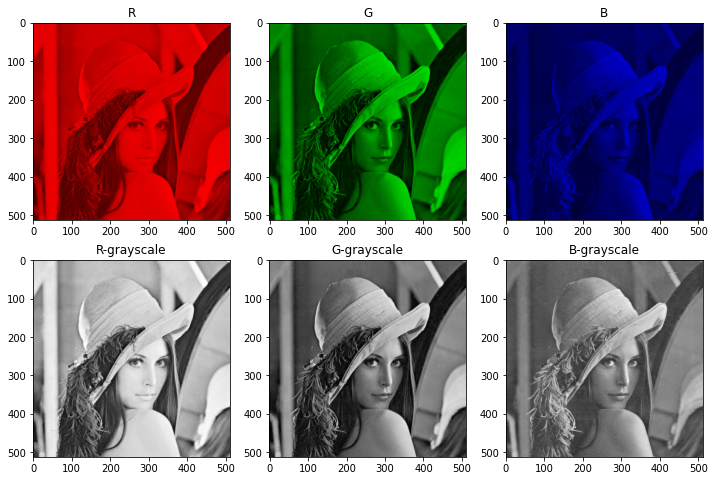

In [ ]:
fig = plt.figure(figsize=(12,8))

title_list = ['R', 'G', 'B', 'R-grayscale', 'G-grayscale', 'B-grayscale']
image_list = [image_red, image_green, image_blue, image_red[:, :, 0], image_green[:, :, 1], image_blue[:, :, 2]]

for i, image in enumerate(image_list):
  ax = fig.add_subplot(2, 3, i+1)
  ax.title.set_text("{}".format(title_list[i]))

  if i >= 3:
    plt.imshow(image, cmap = 'gray')
  else:
    plt.imshow(image)

### 연산 과정

- 각 채널마다 컨볼루션 연산을 적용
  - 3채널을 모두 합쳐서 '하나의 필터'라고 칭함  
    
  <img src="https://miro.medium.com/max/2000/1*8dx6nxpUh2JqvYWPadTwMQ.gif" width="600">

<br>

- 각각의 결과를 더함  
  
  <img src="https://miro.medium.com/max/2000/1*CYB2dyR3EhFs1xNLK8ewiA.gif" width="600">

<br>

- 더한 결과에 편향을 더함  
  <img src="https://miro.medium.com/max/588/1*RYYucIh3U-YFxrIkyQKzRw.gif" width="300">

  <sub>출처: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1</sub>



### modules import

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
import requests
from io import BytesIO


### util functions

In [ ]:
def url_to_image(url, gray=False):
  resp = urllib.request.urlopen(url)
  image = np.array(bytearray(resp.read()), dtype="uint8")

  if gray == True:
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
  else:
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  return image

def conv_op(image, kernel, pad=0, stride=1):
  H, W, C = image.shape

  kernel_size = kernel.shape[0]

  out_h = (H + 2*pad - kernel_size) // stride + 1
  out_w = (W + 2*pad - kernel_size) // stride + 1

  filtered_image = np.zeros((out_h, out_w))
  img = np.pad(image, [(pad,pad), (pad,pad), (0,0)], 'constant')

  print(img.shape, out_h, out_w, C)
  
  for i in range(out_h):
    for j in range(out_w):
      for c in range(C):
        multiply_values = image[i:(i + kernel_size), j:(j + kernel_size), c] * kernel
        sum_value = np.sum(multiply_values)

        filtered_image[i, j] += sum_value

  filtered_img = filtered_image.reshape(1, out_h, out_w, -1).transpose(0,3,1,2)

  return filtered_img.astype(np.uint8)


### 이미지 확인

image.shape (512, 512, 3)


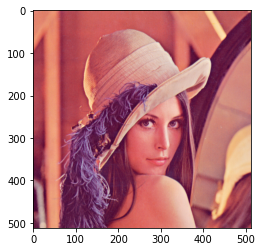

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png?20170110121321"

image = url_to_image(img_url)
print("image.shape", image.shape)

plt.imshow(image)
plt.show()

### 필터연산 적용
- 3x3 크기의 3채널 필터 5개

- (5, 3, 3, 3) ----> (5개, 3채널, 세로, 가로)

In [ ]:
filter1 = np.random.randn(3,3,3)

print(filter1)

[[[ 0.83056937 -0.48452439  1.37909923]
  [ 1.51828356  1.05021753  0.456877  ]
  [-0.02883373  0.96145724 -0.51169047]]

 [[ 0.21224469  0.49518355  0.6480594 ]
  [-0.31277505  1.30763504 -1.64458722]
  [ 0.62449607 -0.2541886  -0.23017508]]

 [[-0.98442284  0.37083698  0.98536578]
  [ 0.66802713  0.69633805  0.05219053]
  [ 1.0322696   1.37348171  0.55010441]]]


(512, 512, 3) 510 510 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 1, 510, 510)


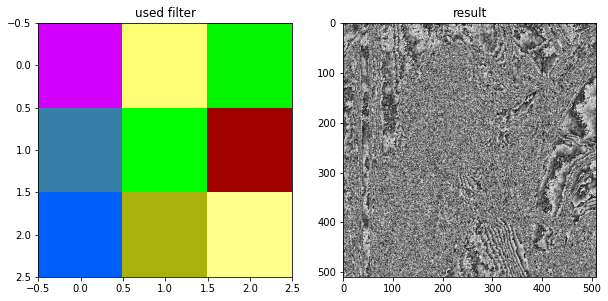

In [ ]:
filterd_img1 = conv_op(image, filter1)
print(filterd_img1.shape)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("used filter")
plt.imshow(filter1, cmap='gray')

plt.subplot(1,2,2)
plt.title("result")
plt.imshow(filterd_img1[0,0, :, :], cmap='gray')
plt.show()

(512, 512, 3) 510 510 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 1, 510, 510)


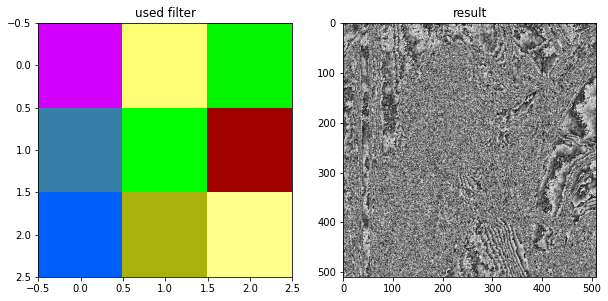

In [ ]:
filterd_img2 = conv_op(image, filter1)
print(filterd_img2.shape)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("used filter")
plt.imshow(filter1, cmap='gray')

plt.subplot(1,2,2)
plt.title("result")
plt.imshow(filterd_img2[0,0, :, :], cmap='gray')
plt.show()

### 필터연산을 적용한 최종 결과

(1, 1, 510, 510)


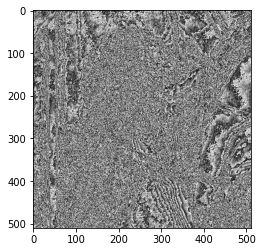

In [ ]:
filtered_img = np.stack([filterd_img1, filterd_img2]).sum(axis=0)
print(filtered_img.shape)

plt.imshow(filtered_img[0,0, :, :], cmap='gray')
plt.show()

### 전체 과정 한번에 보기

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3) 510 510 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3) 510 510 3


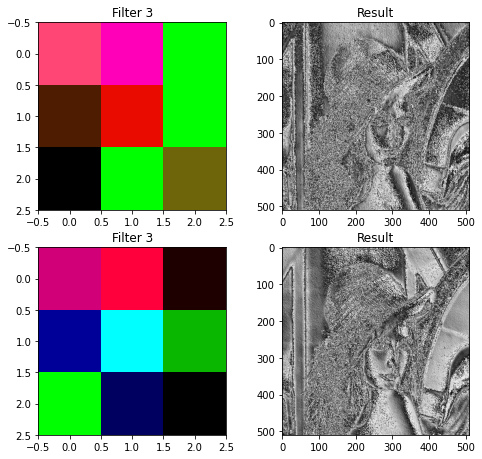

In [ ]:
np.random.seed(222)

fig = plt.figure(figsize=(8,20))

filter_num = 2
filtered_img = []

for i in range(filter_num):
  ax = fig.add_subplot(5,2,2*i+1)
  ax.title.set_text("Filter {}".format(filter_num+1))

  filter = np.random.randn(3,3,3)
  plt.imshow(filter);

  ax = fig.add_subplot(5,2,2*i+2)
  ax.title.set_text("Result")

  filtered = conv_op(image, filter)
  filtered_img.append(filtered)
  plt.imshow(filtered[0, 0, :, :], cmap='gray')

plt.show()


(1, 1, 510, 510)


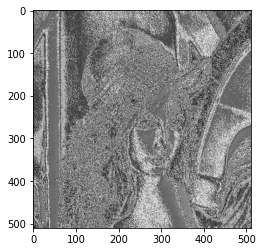

In [ ]:
filtered_img = np.stack(filtered_img).sum(axis=0)
print(filtered_img.shape)

plt.imshow(filtered_img[0,0, :, :], cmap='gray')
plt.show()

# 합성곱 신경망 구현
- 참고: 밑바닥부터 시작하는 딥러닝1

## 합성곱 층(Convolution Layer)

In [ ]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):

  N, C, H, W = input_data.shape
  out_h = (H + 2*pad - filter_h) // stride + 1
  out_w = (W + 2*pad - filter_w) // stride + 1

  img = np.pad(input_data,[(0, 0), (0, 0), (pad,pad), (pad, pad)], 'constant')
  col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

  for y in range(filter_h):
    y_max = y + stride * out_h
    for x in range(filter_w):
      x_max = x + stride * out_w
      col[:, :, y, x, :, :] = img[:, : , y:y_max:stride, x:x_max:stride]

  col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
  return col

def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
  N, C, H, W = input_shape
  out_h = (H + 2*pad - filter_h) // stride + 1
  out_w = (W + 2*pad - filter_w) // stride + 1
  col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0 ,3, 4, 5, 1, 2)

  img = np.zeros(N, C, H + 2*pad + stride -1, W+ 2*pad + stride -1)
  for y in range(filter_h):
    y_max = y + stride * out_h
    for x in range(filter_w):
      x_max = x + stride * out_h
      img[:, :, y:y_max:stride, x:x_max:stride] += col[:,:,y,x:,:]
  return img[:, :, pad:H + pad, pad:W + pad]


In [ ]:
class Conv2D:
  def __init__(self, W, b, stride=1, pad = 0):
    self.W = W
    self.b = b
    self.stride = stride
    self.pad = pad

    self.input_date = None
    self.col = None
    self.col_W = None

    self.dW = None
    self.db = None

  def forward(self, input_data):
    FN, C, FH, FW = self.W.shape
    N, C, H, W = input_data.shape
    out_h = (H + 2*self.pad - FH) // self.stride + 1
    out_w = (W + 2*self.pad - FW) // self.stride + 1

    col = im2col(input_data, FH, FW, self.stride, self.pad)
    col_W = self.W.reshape(FN, -1).T

    out = np.dot(col, col_W) + self.b
    output = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

    self.input_date = input_data
    self.col = col
    self.col_W = col_W

    return output

  def backward(self, dout):
    FN, C, FH, FW = self.W.shape
    dout = dout.transpose(0, 2, 3, 1).reshape(-1, FN)

    self.db = np.sum(dout, axis=0)
    self.dW = np.dot(self.col.T, dout)
    self.dW = self.dW.transpose(1,0).reshape(FN, C, FH, FW)

    dcol = np.dot(dout, self.col_W.T)
    dx = col2im(dcol, self.input_date.shape, FH, FW, self.stride, self.pad)

    return dx


### 컨볼루션 레이어 테스트

In [ ]:
def init_weight(num_filters, data_dim, kernel_size, stride=1, pad=0, weight_std=0.01):

  weights = weight_std * np.random.randn(num_filters, data_dim, kernel_size, kernel_size)
  biases = np.zeros(num_filters)

  return weights, biases

image.shape: (440, 440, 1)


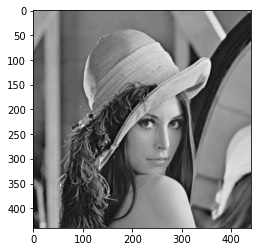

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"
image_gray = url_to_image(img_url, gray=True)
image_gray = image_gray.reshape(image_gray.shape[0], -1, 1)
print("image.shape:", image_gray.shape)

image_gray = np.expand_dims(image_gray.transpose(2, 0, 1), axis=0)

#image = url_to_image(img_url)
#print("image.shape", image.shape)

plt.imshow(image_gray[0, 0, :, :], cmap='gray')
plt.show()

In [ ]:
W, b = init_weight(1, 1, 3)
conv = Conv2D(W, b)
output = conv.forward(image_gray)

print("conv Layer size:", output.shape)

conv Layer size: (1, 1, 438, 438)


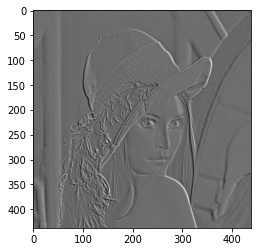

In [ ]:
plt.imshow(output[0, 0, :, :], cmap='gray')
plt.show()

In [ ]:
W, b = init_weight(1, 1, 3)
conv = Conv2D(W, b)
output = conv.forward(image_gray)

print("conv Layer size:", output.shape)

conv Layer size: (1, 1, 438, 438)


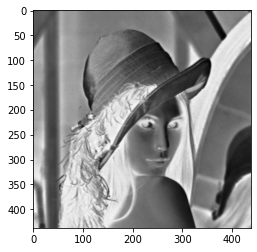

In [ ]:
plt.imshow(output[0, 0, :, :], cmap='gray')
plt.show()

In [ ]:
W2, b2 = init_weight(1, 1, 3)
conv2 = Conv2D(W2, b2, stride=2)
output2 = conv2.forward(image_gray)

print("conv Layer size:", output2.shape)

conv Layer size: (1, 1, 219, 219)


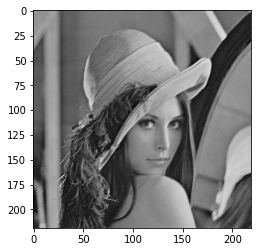

In [ ]:
plt.imshow(output2[0, 0, :, :], cmap='gray')
plt.show()

image.shape: (440, 440, 3)


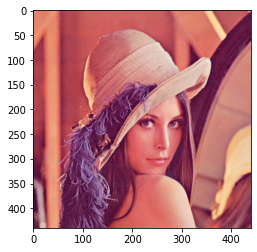

image.shape: (1, 3, 440, 440)


In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"
image_color = url_to_image(img_url)
print("image.shape:", image_color.shape)

plt.imshow(image_color)
plt.show()

image_color = np.expand_dims(image_color.transpose(2, 0, 1), axis=0)
print("image.shape:", image_color.shape)

In [ ]:
W3, b3 = init_weight(10, 3, 3)
conv3 = Conv2D(W3, b3)
output3 = conv3.forward(image_color)

print("conv Layer size:", output3.shape)

conv Layer size: (1, 10, 438, 438)


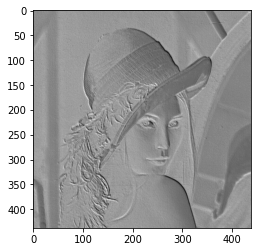

In [ ]:
plt.imshow(output3[0, 3, :, :], cmap='gray')
plt.show()

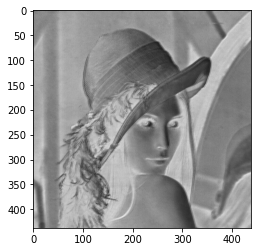

In [ ]:
plt.imshow(output3[0, 8, :, :], cmap='gray')
plt.show()

### 동일한 이미지 여러 장 테스트 (배치 처리)

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"
image_gray = url_to_image(img_url, gray=True)
image_gray = image_gray.reshape(image_gray.shape[0], -1, 1)
print("image.shape:", image_gray.shape)

image_gray = image_gray.transpose(2, 0, 1)
print("image.shape:", image_gray.shape)

image.shape: (440, 440, 1)
image.shape: (1, 440, 440)


In [ ]:
batch_image_gray = np.repeat(image_gray[np.newaxis, :, :, :], 15 , axis=0)
print(batch_image_gray.shape)

(15, 1, 440, 440)


In [ ]:
W4, b4 = init_weight(10, 1, 3, stride=2)
conv4 = Conv2D(W4, b4)
output4 = conv4.forward(batch_image_gray)

print("conv Layer size:", output4.shape)

conv Layer size: (15, 10, 438, 438)


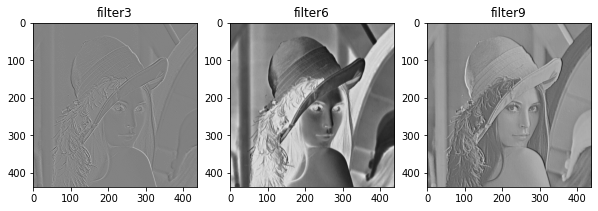

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.title("filter3")
plt.imshow(output4[3,2,:,:], cmap='gray')

plt.subplot(1,3,2)
plt.title("filter6")
plt.imshow(output4[3,5,:,:], cmap='gray')

plt.subplot(1,3,3)
plt.title("filter9")
plt.imshow(output4[3,8,:,:], cmap='gray')

plt.show()

In [ ]:
W5, b5 = init_weight(32, 3, 3, stride=3)
conv5 = Conv2D(W5, b5, stride=3)
output5 = conv5.forward(image_color)

print("conv Layer size:", output5.shape)

conv Layer size: (1, 32, 146, 146)


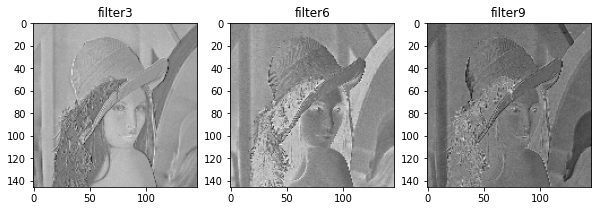

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.title("filter3")
plt.imshow(output5[0,2,:,:], cmap='gray')

plt.subplot(1,3,2)
plt.title("filter6")
plt.imshow(output5[0,5,:,:], cmap='gray')

plt.subplot(1,3,3)
plt.title("filter9")
plt.imshow(output5[0,8,:,:], cmap='gray')

plt.show()

### 동일한 이미지 배치처리(color)

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"
image_color = url_to_image(img_url)
print("image.shape:", image_color.shape)

image_color = image_color.transpose(2, 0, 1)
print("image.shape:", image_color.shape)

image.shape: (440, 440, 3)
image.shape: (3, 440, 440)


In [ ]:
batch_image_color = np.repeat(image_color[np.newaxis, :, :, :], 15 , axis=0)
print(batch_image_color.shape)

(15, 3, 440, 440)


In [ ]:
W6, b6 = init_weight(64, 3, 5)
conv6 = Conv2D(W6, b6, stride=3)
output6 = conv6.forward(batch_image_color)

print("conv Layer size:", output6.shape)

conv Layer size: (15, 64, 146, 146)


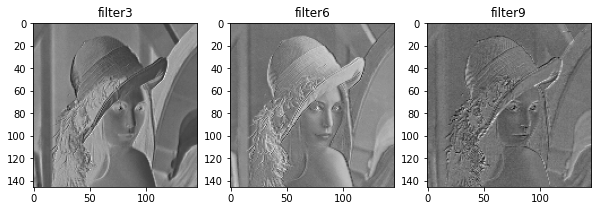

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.title("filter3")
plt.imshow(output6[10,2,:,:], cmap='gray')

plt.subplot(1,3,2)
plt.title("filter6")
plt.imshow(output6[10,5,:,:], cmap='gray')

plt.subplot(1,3,3)
plt.title("filter9")
plt.imshow(output6[10,8,:,:], cmap='gray')

plt.show()

## 풀링 층(Pooling Layer)

### 풀링 레이어 테스트
- 2차원 이미지
  - (Height, Width, 1)

In [ ]:
class Pooling2D:
  def __init__(self, kernel_size=2, stride=1, pad = 0):
    self.kernel_size = kernel_size
    self.stride = stride
    self.pad = pad

    self.input_date = None
    self.arg_max = None

  def forward(self, input_data):
    N, C, H, W = input_data.shape
    out_h = (H - self.kernel_size) // self.stride + 1
    out_w = (W - self.kernel_size) // self.stride + 1

    col = im2col(input_data, self.kernel_size, self.kernel_size, self.stride, self.pad)
    col = col.reshape(-1, self.kernel_size * self.kernel_size)

    arg_max = np.argmax(col, axis=1)
    out = np.max(col, axis =1)
    output = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

    self.input_date = input_data
    self.arg_max = arg_max
    
    return output

  def backward(self, dout):
    dout = dout.transpose(0, 2, 3, 1)

    pool_size = self.kernel_size * self.kernel_size
    dmax = np.zeros((dout.size, pool_size))
    dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
    dmax = dmax.reshape(dout.shape + (pool_size,))

    dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
    dx = col2im(dcol, self.input_date.shape, self.kernel_size, self.kernel_size, self.stride, self.pad)

    return dx


image.shape: (440, 440, 1)


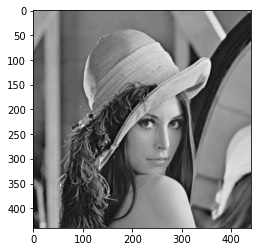

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"
image_gray = url_to_image(img_url, gray=True)
image_gray = image_gray.reshape(image_gray.shape[0], -1, 1)
print("image.shape:", image_gray.shape)

image_gray = np.expand_dims(image_gray.transpose(2, 0, 1), axis=0)

plt.imshow(image_gray[0, 0, :, :], cmap='gray')
plt.show()

In [ ]:
W, b = init_weight(8, 1, 3)
conv = Conv2D(W, b)
pool = Pooling2D(stride=2, kernel_size=2)

In [ ]:
output1 = conv.forward(image_gray)
print("cov size", output1.shape)

cov size (1, 8, 438, 438)


In [ ]:
output1 = pool.forward(output1)
print("pooling size", output1.shape)

pooling size (1, 8, 219, 219)


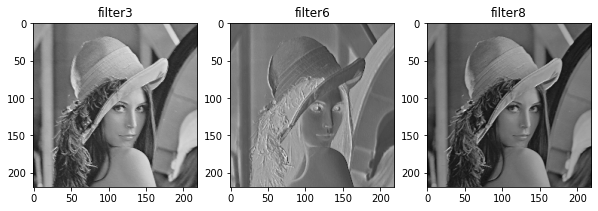

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.title("filter3")
plt.imshow(output1[0,2,:,:], cmap='gray')

plt.subplot(1,3,2)
plt.title("filter6")
plt.imshow(output1[0,5,:,:], cmap='gray')

plt.subplot(1,3,3)
plt.title("filter8")
plt.imshow(output1[0,7,:,:], cmap='gray')

plt.show()

### 동일한 이미지 배치처리
- Color Image

- conv --> maxpooling --> conv --> maxpooling

- 시각화 과정
  - 5번째 이미지
  - [2, 5, 9] 필터를 통해 확인

In [ ]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"
image_color = url_to_image(img_url)
print("image.shape:", image_color.shape)

image_color = image_color.transpose(2, 0, 1)
print("image.shape:", image_color.shape)

image.shape: (440, 440, 3)
image.shape: (3, 440, 440)


In [ ]:
batch_image_color = np.repeat(image_color[np.newaxis, :, :, :], 15 , axis=0)
print(batch_image_color.shape)

(15, 3, 440, 440)


In [ ]:
W, b = init_weight(10, 3, 3)
conv = Conv2D(W, b)
pool = Pooling2D(stride=2, kernel_size=2)

In [ ]:
output1 = conv.forward(batch_image_color)
print("cov size", output1.shape)

cov size (15, 10, 438, 438)


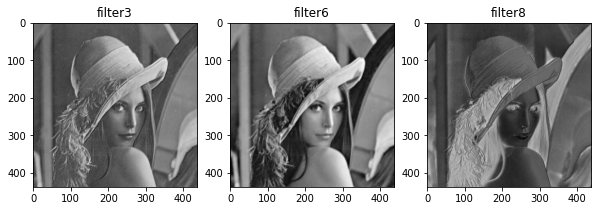

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.title("filter3")
plt.imshow(output1[0,2,:,:], cmap='gray')

plt.subplot(1,3,2)
plt.title("filter6")
plt.imshow(output1[0,5,:,:], cmap='gray')

plt.subplot(1,3,3)
plt.title("filter8")
plt.imshow(output1[0,7,:,:], cmap='gray')

plt.show()

In [ ]:
output1 = pool.forward(output1)
print("pooling size", output1.shape)

pooling size (15, 10, 219, 219)


In [ ]:
W2, b2 = init_weight(30, 10, 3)
conv2 = Conv2D(W2, b2)
pool = Pooling2D(stride=2, kernel_size=2)

In [ ]:
output2 = conv2.forward(output1)
print("cov size", output2.shape)

cov size (15, 30, 217, 217)


In [ ]:
output2 = pool.forward(output2)
print("pooling size", output2.shape)

pooling size (15, 30, 108, 108)


# 대표적인 CNN 모델 소개

## LeNet - 5

<img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png">
  
  <center>[LeNet-5 구조]</center>

  <sub>출처: https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4</sub>

## AlexNet

- 활성화 함수로 **ReLU** 사용

- 국소적 정규화(Local Response normalization, LRN) 실시하는 계층 사용

- 드롭아웃

  <img src="https://miro.medium.com/proxy/1*qyc21qM0oxWEuRaj-XJKcw.png" width="800">

  <center>[AlexNet 구조]</center>

  <sub>출처: http://www.cs.toronto.edu/~hinton/absps/imagenet.pdf</sub>

## VGG - 16

- 모든 컨볼루션 레이어에서의 필터(커널) 사이즈를 **3x3**으로 설정

- 2x2 MaxPooling

- 필터의 개수는 Conv Block을 지나가면서 2배씩 증가  
  32 -> 64 -> 128

  <br>

  <img src="https://www.researchgate.net/profile/Jose_Cano31/publication/327070011/figure/fig1/AS:660549306159105@1534498635256/VGG-16-neural-network-architecture.png" width="800">

  <center>[VGG-16 구조]</center>

  <sub>출처: Very Deep Convolutional Networks for Large-Scale Image Recognition</sub>

# CNN 학습 구현 - MNIST

## modules import

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

## Util Functions

In [ ]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):

  N, C, H, W = input_data.shape
  out_h = (H + 2*pad - filter_h) // stride + 1
  out_w = (W + 2*pad - filter_w) // stride + 1

  img = np.pad(input_data,[(0, 0), (0, 0), (pad,pad), (pad, pad)], 'constant')
  col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

  for y in range(filter_h):
    y_max = y + stride * out_h
    for x in range(filter_w):
      x_max = x + stride * out_w
      col[:, :, y, x, :, :] = img[:, : , y:y_max:stride, x:x_max:stride]

  col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
  return col

def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
  N, C, H, W = input_shape
  out_h = (H + 2*pad - filter_h) // stride + 1
  out_w = (W + 2*pad - filter_w) // stride + 1
  col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0 ,3, 4, 5, 1, 2)

  img = np.zeros((N, C, H + 2*pad + stride -1, W+ 2*pad + stride -1))
  for y in range(filter_h):
    y_max = y + stride * out_h
    for x in range(filter_w):
      x_max = x + stride * out_h
      img[:, :, y:y_max:stride, x:x_max:stride] += col[:,:,y,x,:,:]
  return img[:, :, pad:H + pad, pad:W + pad]

def softmax(x):
  if x.ndim == 2:
    x = x.T
    x = x - np.max(x, axis=0)
    y = np.exp(x) / np.sum(np.exp(-x), axis=0)
    return y.T

  x = x - np.max(x)
  return np.exp(x) / np.sum(np.exp(x))

def sigmoid(x):
  return 1 / (1 + np.exp(-x))  

def mean_squared_error(pred_y, true_y):
  return 0.5 * (np.sum((true_y - pred_y)**2))

def cross_entropy_error(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, true_y.size)
    pred_y = pred_y.reshape(1, pred_y.size)

  print(true_y.size , pred_y.size)
  if true_y.size == pred_y.size:
    true_y = true_y.argmax(axis=1)
  
  batch_size = pred_y.shape[0]

  delta = 1e-7
  return -np.sum(np.log(pred_y[np.arange(batch_size), true_y] + delta)) / batch_size

def softmax_loss(X, true_y):
  pred_y = softmax(X)
  return cross_entropy_error(pred_y, true_y)

## Util Classes

In [ ]:
class ReLU:
  def __Init__(self):
    self.mask = None

  def forward(self, x):
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0

    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout

    return dx

class Sigmoid:
  def __init__(self):
    self.out = None

  def forward(self, x):
    out = sigmoid(x)
    self.out = out
    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out

    return dx

class Layer:
  def __init__(self, W, b):
    self.W = W
    self.b = b
    
    self.input_data = None
    self.input_data_shape = None

    self.dW = None
    self.db = None

  def forward(self, input_data):
    self.input_data_shape = input_data.shape
    input_data = input_data.reshape(input_data.shape[0], -1)
    self.input_data = input_data

    out = np.dot(self.input_data, self.W) + self.b

    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.input_data.T, dout)
    self.db = np.sum(dout, axis=0)

    dx = dx.reshape(*self.input_data_shape)
    return dx

class Softmax:
  def __init__(self):
    self.loss = None
    self.y = None
    self.t = None

  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)

    return self.loss

  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    if self.t.size == self.y.size:
      dx = (self.y - self.t) / batch_size
    else:
      dx = self.y.copy()
      dx[np.arange(batch_size), self.t] -= 1
      dx = dx / batch_size

    return dx
     

In [ ]:
class SGD:
  def __init__(self, learning_rate=0.01):
    self.learning_rate = learning_rate

  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.learning_rate * grads[key]

## 데이터 로드

In [ ]:
np.random.seed(42)

mnist = tf.keras.datasets.mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()
num_classes = 10

print(x_train.shape)

(60000, 28, 28)


In [ ]:
x_train, x_test = np.expand_dims(x_train, axis=1), np.expand_dims(x_test, axis=1)

In [ ]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 1, 28, 28)
(60000,)
(10000, 1, 28, 28)
(10000,)


In [ ]:
x_train = x_train[:3000]
x_test = x_test[:500]
t_train = x_train[:3000]
t_test = x_test[:500]

## Bulid Model

In [ ]:
class MyModel:
  
  def __init__(self, input_dim=(1,28,28), num_outputs=10):
    conv1_block = {'num_filters' : 30,
                   'kernel_size' : 3,
                   'stride' : 1,
                   'pad': 0}

    input_size = input_dim[1]
    conv_output_size = ((input_size - conv1_block['kernel_size'] + 2*conv1_block['pad']) // conv1_block['stride']) + 1
    pool_output_size = int(conv1_block['num_filters'] * (conv_output_size/2) * (conv_output_size/2))

    self.params = {}
    self.params['W1'], self.params['b1'] = self.__init__weights_conv(conv1_block['num_filters'], input_dim[0], 3)
    self.params['W2'], self.params['b2'] = self.__init__weight_fc(pool_output_size, 256)
    self.params['W3'], self.params['b3'] = self.__init__weight_fc(256, 10)

    self.layers = OrderedDict()

    self.layers['Conv1'] = Conv2D(self.params['W1'], self.params['b1'])
    self.layers['ReLU1'] = ReLU()
    self.layers['Pool1'] = Pooling2D(kernel_size=2, stride=2)
    self.layers['FC1'] = Layer(self.params['W2'], self.params['b2'])
    self.layers['ReLU'] = ReLU()
    self.layers['FC2'] = Layer(self.params['W3'], self.params['b3'])
    self.last_layer = Softmax()

  def __init__weights_conv(self, num_filter, data_dims, kernel_size, stride=1, pad=0, weight_std=0.01):
    weights = weight_std * np.random.randn(num_filter, data_dims, kernel_size, kernel_size)
    biases = np.zeros(num_filter)
    return weights, biases

  def __init__weight_fc(self, num_inputs, num_outputs, weight_std = 0.01):
    weights = weight_std * np.random.randn(num_inputs, num_outputs)
    biases = np.zeros(num_outputs)
    return weights, biases

  def forward(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)
    return x

  def loss(self, x, true_y):
    pred_y = self.forward(x)
    return self.last_layer.forward(pred_y, true_y)

  def accuracy(self, x, true_y, batch_size=100):
    if true_y.ndim != 1:
      true_y = np.argmax(true_y, axis=1)

    accuracy = 0.0

    for i in range(int(x.shape[0] / batch_size)):
      tx = x[i*batch_size:(i+1)*batch_size]
      tt = true_y[i*batch_size:(i+1)*batch_size]
      y = self.forward(x)
      y = np.argmax(y, axis=1)
      accuracy += np.sum(y ==tt)

    return accuracy / x.shape[0]

  def gradient(self, x, true_y)    :
    self.loss(x, true_y)
              
    dout = 1
    dout = self.last_layer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)

    grads = {}

    grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
    grads['W2'], grads['b2'] = self.layers['FC1'].dW, self.layers['FC1'].db
    grads['W3'], grads['b3'] = self.layers['FC2'].dW, self.layers['FC2'].db

    return grads


## Hyper Parameters

In [ ]:
epochs = 10
train_size = x_train.shape[0]
batch_size = 200
learning_rate = 0.001
current_iter = 0

iter_per_epoch = max(train_size // batch_size, 1)

In [ ]:
train_loss_list = []
train_acc_list = []
test_acc_lsit=[]

## 모델 생성 및 학습

In [ ]:
model = MyModel()
print(model.params.keys())

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])


In [ ]:
optimizer = SGD(learning_rate)

In [ ]:
for epoch in range(epochs):
  for i in range(iter_per_epoch):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = model.gradient(x_batch, t_batch)
    optimizer.update(model.params, grads)

    loss = model.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    x_train_sample, t_train_sample = x_train, t_train
    x_test_sample, t_test_sample = x_test, t_test

    train_acc = model.accuracy(x_test_sample, t_train_sample)
    test_acc = model.accuracy(x_test_sample, t_test_sample)
    train_acc_list.append(train_acc)
    test_acc_lsit.append(test_acc)

    current_iter += 1

  print("epoch: {} Train Loss: {:.4f} Train Acc: {:.4f} Test Acc: {:4.f}".format(epoch+1, loss, train_acc, test_acc))

156800 2000
(200, 1, 28, 28)
(200, 10)


IndexError: ignored

### 생각보다 학습이 잘 되지 않았던 이유
- 학습 데이터의 수 부족
  - 학습 시간고려

- FC Layer의 노드수가 적절했는지

- 학습률(learning rate)값이 적절했는지

- ...

## 어떠한 조건에서 가장 좋은 결과를 내는지는 값을 **적절히** 바꾸어 시도해보아야함